In [1]:
import numpy as np
from numpy import sin, cos, arccos, arctan2
from numpy.linalg import norm
import scipy.special
import scipy.integrate
import scipy.io
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt

from constants import *
from coordinates import ecef_eci, ecef2eci, eci2ecef
from force_models import dynamics, accelerations, dynamics_full
from plotting import plot_eci, plot_forces, plot_eci_x

# Test how long a function call takes
# %%timeit
# dynamics(init_epoch*86400, s_i)

Phi_true = scipy.io.loadmat('./problem_data_files/Phi_21600_0.mat')['PHI_t_120']

In [13]:
si = s_i5
ti = init_epoch5 * 86400
t_eval = np.linspace(ti,ti+21600/10,100)

t_eval2 = np.linspace(ti,ti-21600/10,100)

solution = scipy.integrate.solve_ivp(
    lambda t,s: dynamics_full(t,s,['2body',0,0,0,0]),
    t_span = [t_eval[0], t_eval[-1]],
    t_eval = t_eval,
    y0 = np.concatenate([init_state,np.array([1.88])]),
    rtol=1e-6,
    atol=1e-6
)

solution2 = scipy.integrate.solve_ivp(
    lambda t,s: dynamics_full(t,s,['2body',0,0,0,0]),
    t_span = [t_eval2[0], t_eval2[-1]],
    t_eval = t_eval2,
    y0 = np.concatenate([init_state,np.array([1.88])]),
    rtol=1e-6,
    atol=1e-6
)



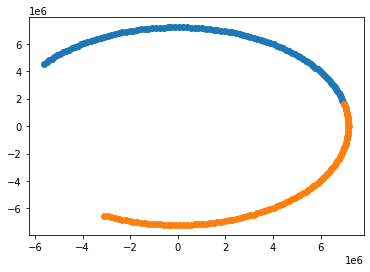

In [15]:
plt.scatter(solution.y[0],solution.y[1])
plt.scatter(solution2.y[0],solution2.y[1])

In [2]:
t_eval = np.arange(init_epoch5*86400, init_epoch5*86400 + 21600 + 60, 60)

Phi0 = np.eye(7)
init_state = np.concatenate([s_i5, Phi0.flatten()])

In [3]:
# %%timeit
# dynamics_full(init_epoch*86400, init_state)

In [4]:
t_eval = np.arange(init_epoch5*86400, init_epoch5*86400 + 21600 + 60, 60)

Phi0 = np.eye(7)
init_state = np.concatenate([s_i5, Phi0.flatten()])

solution = scipy.integrate.solve_ivp(
    lambda t,s: dynamics_full(t,s,['J4',1,1,1,1]),
    t_span = [t_eval[0], t_eval[-1]],
    t_eval = t_eval,
    y0 = np.concatenate([init_state,np.array([1.88])]),
    rtol=1e-6,
    atol=1e-6
)

In [6]:
states = solution.y[:6]
phis = solution.y[7:]

Phi = phis[:,-1].reshape((7,7))

In [7]:
reldiff = np.abs((Phi - Phi_true) / Phi_true)
reldiff = np.nan_to_num(reldiff)

/tmp/ipykernel_534450/2814432523.py:1: RuntimeWarning: divide by zero encountered in divide
  reldiff = np.abs((Phi - Phi_true) / Phi_true)
/tmp/ipykernel_534450/2814432523.py:1: RuntimeWarning: invalid value encountered in divide
  reldiff = np.abs((Phi - Phi_true) / Phi_true)


/tmp/ipykernel_534450/2198894537.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.nan_to_num(np.log10(reldiff.flatten()),posinf=np.nan, neginf=np.nan),bins=20)


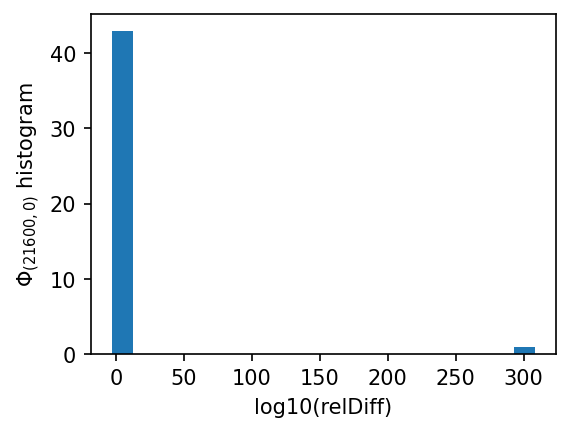

In [8]:
fig = plt.figure(figsize=(4,3),dpi=150)
plt.hist(np.nan_to_num(np.log10(reldiff.flatten()),posinf=np.nan, neginf=np.nan),bins=20)
plt.ylabel('$\Phi_{(21600,0)}$ histogram')
plt.xlabel('log10(relDiff)')
plt.show()

/tmp/ipykernel_534450/3638632900.py:2: RuntimeWarning: divide by zero encountered in log10
  color = plt.imshow(np.log10(reldiff))


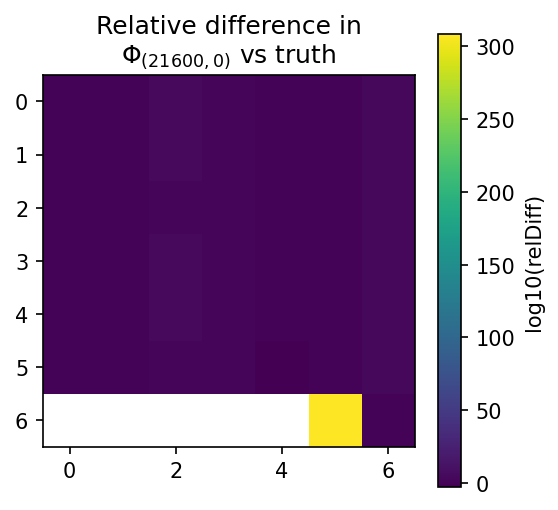

In [9]:
fig = plt.figure(figsize=(4,4),dpi=150)
color = plt.imshow(np.log10(reldiff))
plt.colorbar(color,label='log10(relDiff)')
plt.title('Relative difference in\n$\Phi_{(21600,0)}$ vs truth')
plt.show()

/tmp/ipykernel_355731/2365597133.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(Phi_true)))


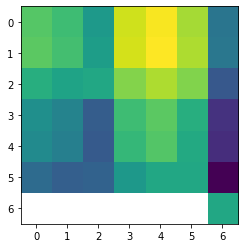

In [9]:
plt.imshow(np.log10(np.abs(Phi_true)))

/tmp/ipykernel_355731/3712433356.py:1: RuntimeWarning: invalid value encountered in divide
  color = plt.imshow(np.log10(np.abs((Phi - Phi_true)/Phi_true)))
/tmp/ipykernel_355731/3712433356.py:1: RuntimeWarning: divide by zero encountered in log10
  color = plt.imshow(np.log10(np.abs((Phi - Phi_true)/Phi_true)))


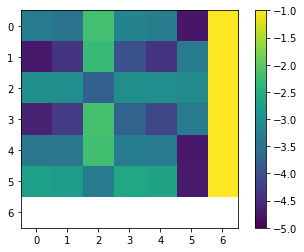

In [15]:
color = plt.imshow(np.log10(np.abs((Phi - Phi_true)/Phi_true)))
plt.colorbar(color)
plt.clim(-5,-1)

In [24]:
reldiff[:3,:3]

array([[4.34753628e-04, 3.41869335e-04, 6.28176101e-03],
       [1.85269431e-05, 3.99274021e-05, 4.91831952e-03],
       [9.47951005e-04, 9.13520175e-04, 1.74115230e-04]])

In [29]:
Phi[:3,:3] @ s_i[:3] / 1e3

array([-291819.26493389,  393240.52719181,   14367.15507335])

In [32]:
Phi[:3,:3]

array([[-39.32199266, -10.48025801,  -0.17739441],
       [ 52.81363751,  14.87665022,   0.29217323],
       [  1.92580729,   0.57275419,  -0.91701677]])